https://scikit-learn.ru/stable/modules/decomposition.html#decompositions

# PCA

In [293]:
import warnings
warnings.filterwarnings('ignore')

In [246]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.datasets import make_swiss_roll
X, y = make_regression(n_samples=2000, n_features=3, n_informative=3, noise=15, random_state=5)

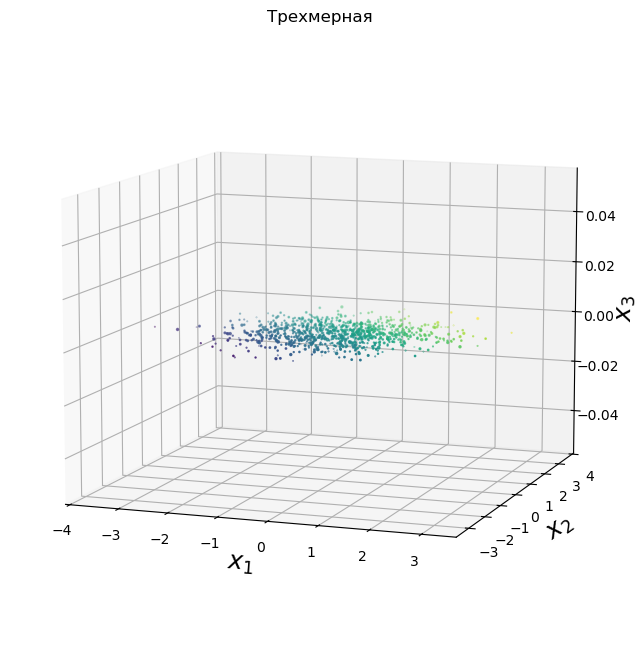

In [179]:
fig = plt.figure(figsize=(8, 10))
ax = fig.add_subplot(111, projection='3d')
plt.grid()
plt.scatter(X[:, 0], X[:, 1], X[:, 2], c=y)
ax.set_xlabel("$x_1$", fontsize=18)
ax.set_ylabel("$x_2$", fontsize=18)
ax.set_zlabel("$x_3$", fontsize=18)
ax.view_init(10, -70)

plt.title('Трехмерная');

In [180]:
from sklearn.decomposition import PCA

In [181]:
pca = PCA(n_components=1)
pca.fit(X)

PCA(n_components=1)

In [182]:
X2D = pca.transform(X)

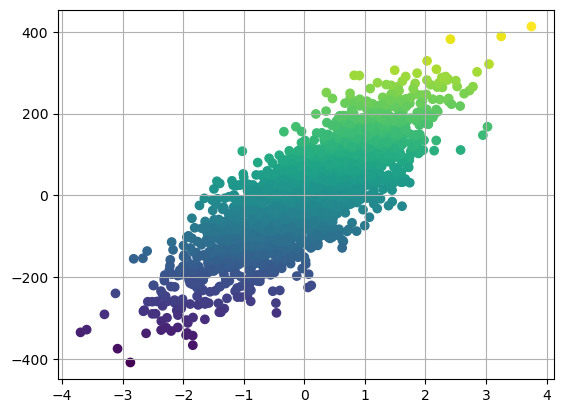

In [244]:
plt.grid()
plt.scatter(X2D, y, c=y);

In [184]:
X2D

array([[ 0.27538928],
       [-0.06201963],
       [-0.85192918],
       ...,
       [-0.63355622],
       [-0.84646221],
       [ 0.3216831 ]])

In [185]:
X_centered = X - X.mean(axis=0)
U, S, VT = np.linalg.svd(X_centered)
V = VT.T
V # Вектора главных компонент

array([[ 0.45206498, -0.87919166, -0.15052998],
       [ 0.66855126,  0.44568435, -0.59531896],
       [ 0.59048832,  0.16848585,  0.78926298]])

In [186]:
V.shape

(3, 3)

In [187]:
X_centered@V

array([[ 0.27538928,  1.92653842,  0.96876558],
       [-0.06201963,  1.26123798, -0.02226628],
       [-0.85192918,  0.48875169, -1.07992823],
       ...,
       [-0.63355622, -0.46967976,  0.49776951],
       [-0.84646221,  1.18633935, -0.76860751],
       [ 0.3216831 , -0.03859589,  0.73343849]])

In [188]:
pca.components_.T

array([[0.45206498],
       [0.66855126],
       [0.59048832]])

In [189]:
pca.explained_variance_ratio_

array([0.34466265])

In [190]:
pca = PCA()
pca

PCA()

In [191]:
Xtrans = pca.fit_transform(X)

## explained_varience_ratio_

Коэффициент объясняемой дисперсии - показывает сколько % дисперсии всех данных лежит вдоль каждого компонента

In [192]:
pca.explained_variance_ratio_

array([0.34466265, 0.33244991, 0.32288744])

Определения числа $d$(n_components) - Реализовать PCA без предворительного понижения и вычислить количество компонент которые в сумме дадут заданный порог дисперсии - 95%

In [193]:
cumsum = np.cumsum(pca.explained_variance_ratio_)
cumsum

array([0.34466265, 0.67711256, 1.        ])

In [194]:
np.argmax(cumsum>=0.95)+1

3

Задать количество компонент долей дисперсии которую необходимо оставить

In [195]:
pca = PCA(n_components=0.60)
Xtrans = pca.fit_transform(X)

In [196]:
pca.explained_variance_ratio_

array([0.34466265, 0.33244991])

## inverse_transform

Сжатый набор данных возможно возвратить до исходного с *ошибкой восстановления*(Средний квадрат расстояния между первоначальными и восстановленными данными). \
Ошибка связана с утерей некоторой информации о данных в рамках отброшенного % дисперсии
$$ 
X_{reconstruction} = X_{d-projection} {W_d}^T
$$
$X_{reconstruction}$ - Реконструкция данных до исходных измерений\
$X_{d-projection}$ - Матрица данных с пониженной размерностью\
${W_d}^T$ - Матрица вектор-столбцов главных компонент

In [206]:
X, X.shape

(array([[-1.71594499,  0.44801517,  1.26652002],
        [-1.13436914,  0.51590608,  0.17300552],
        [-0.65308624,  0.27317221, -1.25835328],
        ...,
        [ 0.05078665, -0.94722556, -0.0456703 ],
        [-1.31079117,  0.40239594, -0.89187752],
        [ 0.0681363 , -0.25676998,  0.7770237 ]]),
 (2000, 3))

In [226]:
pca = PCA()
Xd = pca.fit_transform(X)
pca

PCA()

In [237]:
Xd

array([[ 0.27538928, -1.92653842,  0.96876558],
       [-0.06201963, -1.26123798, -0.02226628],
       [-0.85192918, -0.48875169, -1.07992823],
       ...,
       [-0.63355622,  0.46967976,  0.49776951],
       [-0.84646221, -1.18633935, -0.76860751],
       [ 0.3216831 ,  0.03859589,  0.73343849]])

In [227]:
WdT = pca.components_
WdT

array([[ 0.45206498,  0.66855126,  0.59048832],
       [ 0.87919166, -0.44568435, -0.16848585],
       [-0.15052998, -0.59531896,  0.78926298]])

In [228]:
Xd@WdT

array([[-1.71513093,  0.46601536,  1.25181942],
       [-1.13355508,  0.53390627,  0.15830493],
       [-0.65227218,  0.2911724 , -1.27305387],
       ...,
       [ 0.05160071, -0.92922536, -0.06037089],
       [-1.30997711,  0.42039613, -0.90657812],
       [ 0.06895036, -0.23876978,  0.7623231 ]])

## svd_solver

Гиперпараметр \
`randomized` - Рандомизированный анализ главных компонент, использующий стахостический алгоритм, имеюющий более быструю эмпирическую сложность для быстрого нахождения аппроксимации первых d-главных компонент для больших объемов данных. \
`auto` - Автоматический подбор алгоритмы\
`full` - Полный SVD

In [229]:
pca_s = PCA(svd_solver='randomized')
pca

PCA()

# Incremental PCA

Реализация алгоритма PCA с использованием обучения на нескольких пакетах(**batches**) из исходного набора, вместо помещения в память полного набора данных.

In [230]:
from sklearn.decomposition import IncrementalPCA

In [231]:
IPCA = IncrementalPCA()
IPCA

IncrementalPCA()

In [233]:
X.shape

(2000, 3)

## np.array_split

In [234]:
n_batches = 100
for i_batch in np.array_split(X, n_batches):
    IPCA.partial_fit(i_batch)
IPCA

IncrementalPCA()

In [236]:
X_reduced = IPCA.transform(X)
X_reduced

array([[ 0.27538928, -1.92653842,  0.96876558],
       [-0.06201963, -1.26123798, -0.02226628],
       [-0.85192918, -0.48875169, -1.07992823],
       ...,
       [-0.63355622,  0.46967976,  0.49776951],
       [-0.84646221, -1.18633935, -0.76860751],
       [ 0.3216831 ,  0.03859589,  0.73343849]])

In [240]:
# Сравнение результатов
np.allclose(IPCA.mean_, pca.mean_)

True

In [241]:
np.allclose(Xd, X_reduced)

True

# Kernel PCA

Ядерный анализ главных компонент

In [242]:
from sklearn.decomposition import KernelPCA

# LLE

**Locally Linear Embedding** - Локальное линейное вложение. Прием *нелинейного понижения размерности*(Nonlinear Dimensionality Reduction - NLDR)

In [279]:
X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=41)

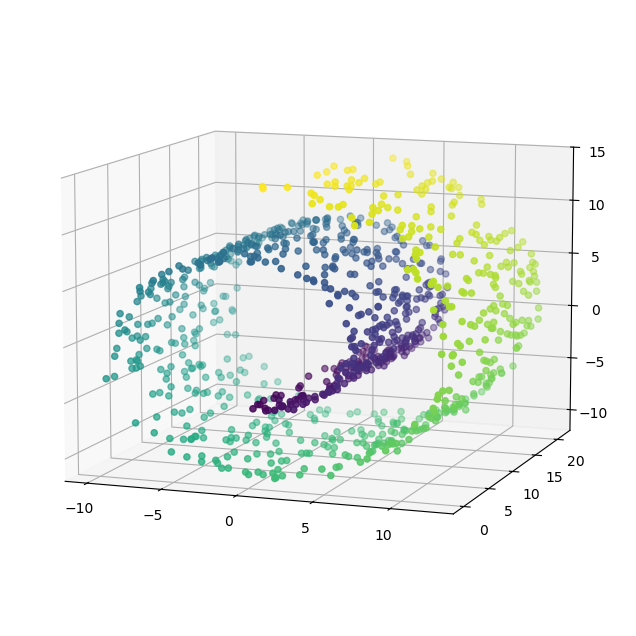

In [310]:
axes = [-11.5, 14, -2, 23, -12, 15]
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=t)
ax.view_init(10, -70)
ax.set_xlim(axes[0:2])
ax.set_ylim(axes[2:4])
ax.set_zlim(axes[4:6]);

In [282]:
from sklearn.manifold import LocallyLinearEmbedding

In [283]:
LLE = LocallyLinearEmbedding(n_components=2, n_neighbors=10, random_state=42)
X_reduced = LLE.fit_transform(X)

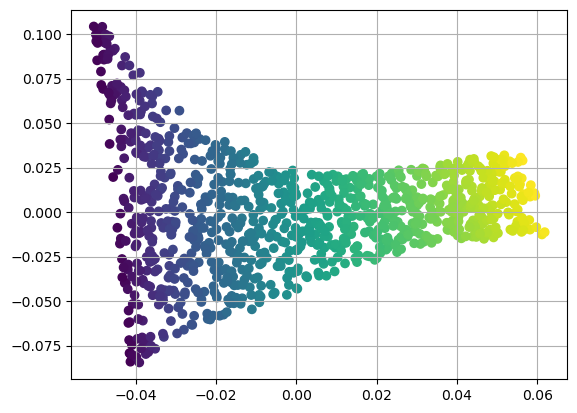

In [288]:
plt.grid()
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t);

# MDS

In [322]:
from sklearn.manifold import MDS

In [338]:
mds = MDS(n_components=2, random_state=42)
X_reduced = mds.fit_transform(X)

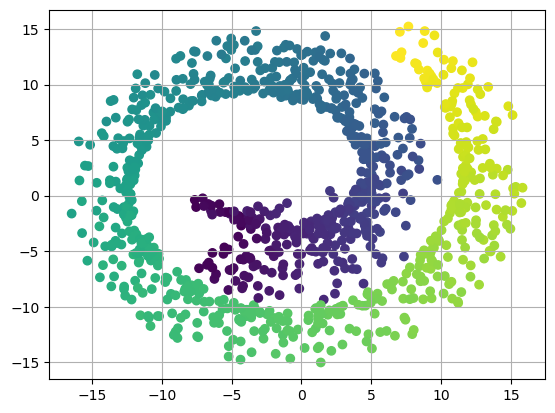

In [339]:
plt.grid()
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t);

# Isomap

In [340]:
from sklearn.manifold import Isomap

isomap = Isomap(n_components=2)
X_reduced = isomap.fit_transform(X)

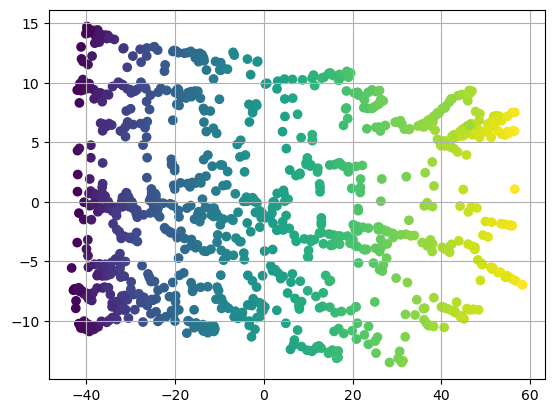

In [341]:
plt.grid()
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t);

# TSNE

In [342]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=10)
X_reduced = tsne.fit_transform(X)

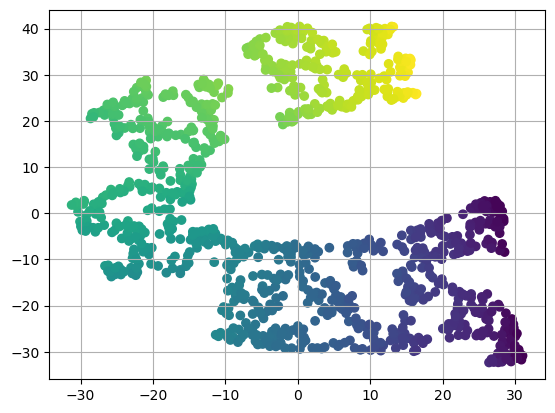

In [343]:
plt.grid()
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t);